In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)

data = {
    "age": np.random.randint(20, 60, 100),
    "experience": np.random.randint(0, 40, 100),
    "salary": np.random.randint(20000, 120000, 100)
}

df = pd.DataFrame(data)
df

,age,experience,salary
0,58,22,62107
1,48,23,106202
2,34,36,71663
3,27,34,35708
4,40,39,111906
...,...,...,...
95,28,21,96213
96,27,10,25895
97,31,15,39738
98,53,32,50746


In [3]:
df.head()

,age,experience,salary
0,58,22,62107
1,48,23,106202
2,34,36,71663
3,27,34,35708
4,40,39,111906


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         100 non-null    int32
 1   experience  100 non-null    int32
 2   salary      100 non-null    int32
dtypes: int32(3)
memory usage: 1.3 KB


In [5]:
df.describe()

,age,experience,salary
count,100.000000,100.000000,100.000000
mean,38.790000,20.360000,65317.410000
std,11.556008,12.488799,29887.321655
min,20.000000,0.000000,21802.000000
25%,28.000000,9.500000,37233.250000
50%,39.500000,23.000000,65869.500000
75%,47.250000,31.000000,91491.750000
max,59.000000,39.000000,119522.000000


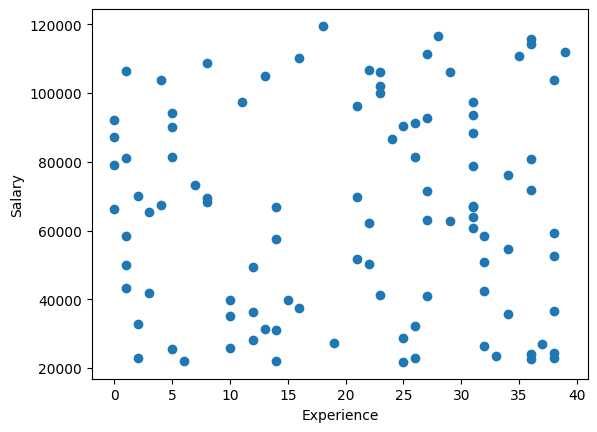

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df["experience"], df["salary"])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

The scatter plot shows a very weak relationship between experience and salary, with high variance across all experience levels. This indicates that experience alone is not a strong predictor of salary, and linear regression may underperform without additional features.

In [7]:
X = df[["experience"]]
y = df["salary"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 1)
(20, 1)
(80,)
(20,)


In this step, the dataset was split into training and testing sets to evaluate the model’s generalization ability. Since only one feature is used, the model may underfit due to limited explanatory power, which will be evaluated in the next step.

LINEAR REGRESSION

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
print(model.coef_)      # slope
print(model.intercept_) # intercept

[-34.13008393]
66669.74466607104


In [12]:
y_pred = model.predict(X_test)

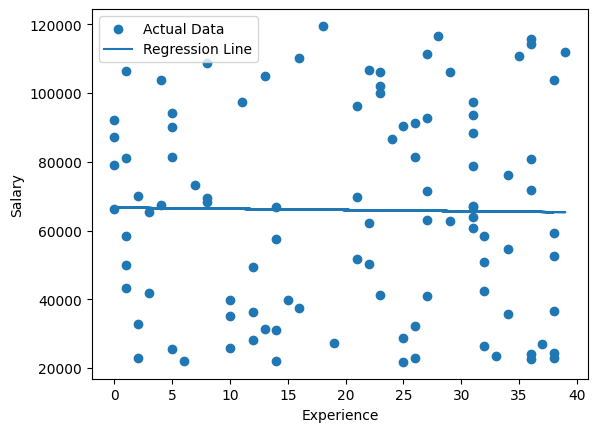

In [13]:
plt.scatter(X, y, label="Actual Data")
plt.plot(X, model.predict(X), label="Regression Line")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

The regression line fails to capture the variability in the data, indicating underfitting. This occurs because experience alone is insufficient to explain salary variations, and the linear model is too simple for the underlying data complexity.

In [14]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 1041295119.1638367


In [15]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: -0.014940166342022998


The low R² score and high MSE confirm that the linear regression model underfits the data. This is due to limited feature representation and high variance in salary values. Improving model performance would require additional features or more complex models.